This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [2]:
folder = 'Tissue_Studies/09_11_18_Regional'
bucket = 'ccurtis.data'
#experiment = 'test' #Used for naming purposes. Should exclude XY and well information

#vids = 2
to_track = []
frames = 651
fps = 100.02
umppx = 0.07

vids = 15
types = ['PS']
pups = [2, 3]
slices = [1, 2, 3]
for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))

In [ ]:
to_track

In [3]:
experiment = 'PS'
slices, bins, well_names = msd.binning(to_track, wells = 18, prefix=experiment)

In [15]:
well_names

['PS_W0',
 'PS_W1',
 'PS_W2',
 'PS_W3',
 'PS_W4',
 'PS_W5',
 'PS_W6',
 'PS_W7',
 'PS_W8',
 'PS_W9',
 'PS_W10',
 'PS_W11',
 'PS_W12',
 'PS_W13',
 'PS_W14',
 'PS_W15',
 'PS_W16',
 'PS_W17']

In [10]:
bins1 = {}
bins1['PS_cortex'] = well_names[0::3]
bins1['PS_hipp'] = well_names[1::3]
bins1['PS_hypo'] = well_names[2::3]

In [11]:
bins1

{'PS_cortex': ['PS_W0', 'PS_W3', 'PS_W6', 'PS_W9', 'PS_W12', 'PS_W15'],
 'PS_hipp': ['PS_W1', 'PS_W4', 'PS_W7', 'PS_W10', 'PS_W13', 'PS_W16'],
 'PS_hypo': ['PS_W2', 'PS_W5', 'PS_W8', 'PS_W11', 'PS_W14', 'PS_W17']}

In [5]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    #aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    #aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    #gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
                                                                 remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with PS_P2_S1_XY01
Done with PS_P2_S1_XY02
Done with PS_P2_S1_XY03
Done with PS_P2_S1_XY04
Done with PS_P2_S1_XY05
Done with PS_P2_S1_XY06
Done with PS_P2_S1_XY07
Done with PS_P2_S1_XY08
Done with PS_P2_S1_XY09
Done with PS_P2_S1_XY10
Done with PS_P2_S1_XY11
Done with PS_P2_S1_XY12
Done with PS_P2_S1_XY13
Done with PS_P2_S1_XY14
Done with PS_P2_S1_XY15
Done with PS_P2_S2_XY01
Done with PS_P2_S2_XY02
Done with PS_P2_S2_XY03
Done with PS_P2_S2_XY04
Done with PS_P2_S2_XY05
Done with PS_P2_S2_XY06
Done with PS_P2_S2_XY07
Done with PS_P2_S2_XY08
Done with PS_P2_S2_XY09
Done with PS_P2_S2_XY10
Done with PS_P2_S2_XY11
Done with PS_P2_S2_XY12
Done with PS_P2_S2_XY13
Done with PS_P2_S2_XY14
Done with PS_P2_S2_XY15
Done with PS_P2_S3_XY01
Done with PS_P2_S3_XY02
Done with PS_P2_S3_XY03
Done with PS_P2_S3_XY04
Done with PS_P2_S3_XY05
Done with PS_P2_S3_XY06
Done with PS_P2_S3_XY07
Done with PS_P2_S3_XY08
Done with PS_P2_S3_XY09
Done with PS_P2_S3_XY10
Done with PS_P2_S3_XY11
Done with PS_P2_

In [8]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

for key in bins:
    print(key)
    wo_slices[key], wh[key] = msd.precision_weight(bins[key], gSEM)
    geodata = msd.precision_averaging(bins[key], geomean, gSEM, wo_slices[key],
                                  bucket=bucket, folder=folder, experiment=key)
    geo_slices[key] = geodata.geomean
    gSEM_slices[key] = geodata.geostd
    
#weights, wh1 = precision_weight(well_names, gSEM_slices)
#geo, gS, w_holder1, gh1 = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

PS_W0
PS_W1
PS_W2
PS_W3
PS_W4
PS_W5
PS_W6
PS_W7
PS_W8
PS_W9
PS_W10
PS_W11
PS_W12
PS_W13
PS_W14
PS_W15
PS_W16
PS_W17


In [13]:
geo_slices1 = {}
gSEM_slices1 = {}

w_slices1 = {}
wo_slices1 = {}
w_holder1 = {}
wh1 = {}
gh1 = {}

for key in bins1:
    print(key)
    wo_slices1[key], wh1[key] = msd.precision_weight(bins1[key], gSEM_slices)
    geodata = msd.precision_averaging(bins1[key], geo_slices, gSEM_slices, wo_slices1[key],
                                  bucket=bucket, folder=folder, experiment=key)
    geo_slices1[key] = geodata.geomean
    gSEM_slices1[key] = geodata.geostd

PS_cortex
PS_hipp
PS_hypo


In [ ]:
weights, wh1 = msd.precision_weight(to_track, gSEM)
geodata = msd.precision_averaging(to_track, geomean, gSEM, weights,
                                  bucket=bucket, folder=folder, experiment='gel_12_percent_bulk')

Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

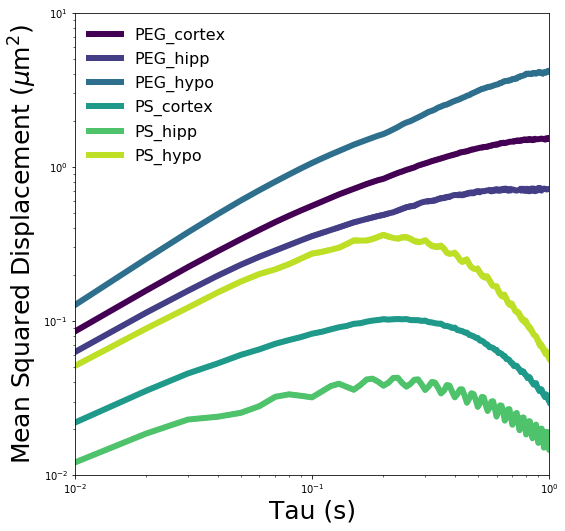

In [17]:
msd.plot_all_experiments(['PEG_cortex', 'PEG_hipp', 'PEG_hypo', 'PS_cortex', 'PS_hipp', 'PS_hypo'],
                         yrange=(10**-2, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(['gel_04_percent_bulk', 'gel_12_percent_bulk'], yrange=(10**-3, 10**-1), bucket=bucket, folder=folder)

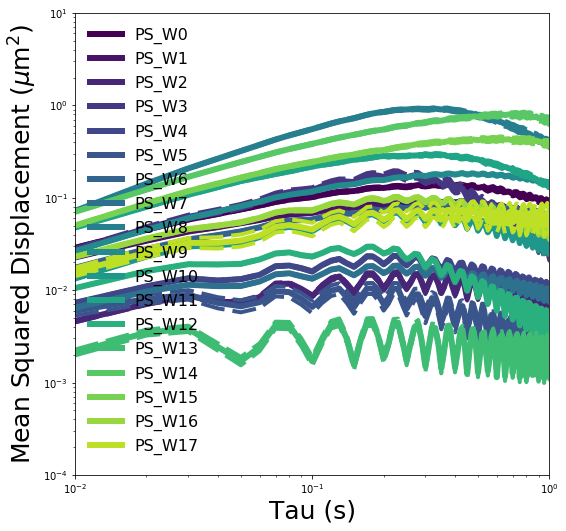

In [16]:
msd.plot_all_experiments(well_names, yrange=(10**-4, 10**1), bucket=bucket, folder=folder)